In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from utils import *

%load_ext autoreload

%autoreload 2

In [2]:
def plotMutualInformation(X_train, X_test, y_train):
    f1 = SelectKBest(score_func=mutual_info_regression, k='all')
    f1.fit(X_train, y_train)
    f2 = SelectKBest(score_func=f_regression, k='all')
    f2.fit(X_train, y_train)

    fig, axs = plt.subplots(2)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    axs[0].bar(X_train.columns, f1.scores_)
    axs[0].set_title("Mutual Information")
    axs[1].bar(X_train.columns, f2.scores_)
    axs[1].set_title("F Scores")
    fig.tight_layout()


    print("Mutual Information")
    for i in range(len(f1.scores_)):
        print(f"{X_train.columns[i]}: {f1.scores_[i]}")
    print("___________________________________________")
    print("F Scores")
    for i in range(len(f2.scores_)):
        print(f"{X_train.columns[i]}: {f2.scores_[i]}")

    xtrain = X_train.drop(columns=['cut','depth','table'])
    xtest = X_test.drop(columns=['cut','depth','table'])

    return f1,f2, xtrain, xtest, 

/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Mutual Information
carat: 1.6463647780833806
cut: 0.052647455025728096
color: 0.1398528013148863
clarity: 0.21466209305932615
depth: 0.03168334605641032
table: 0.03476313619652327
x: 1.4106902212295873
y: 1.4158563774276063
z: 1.358792677446277
___________________________________________
F Scores
carat: 272218.8370111294
cut: 155.31937908338165
color: 1473.0594735907719
clarity: 1068.8364201113068
depth: 2.5242857643077232
table: 793.775825568028
x: 173880.57026412053
y: 141642.10438750018
z: 136717.646978118


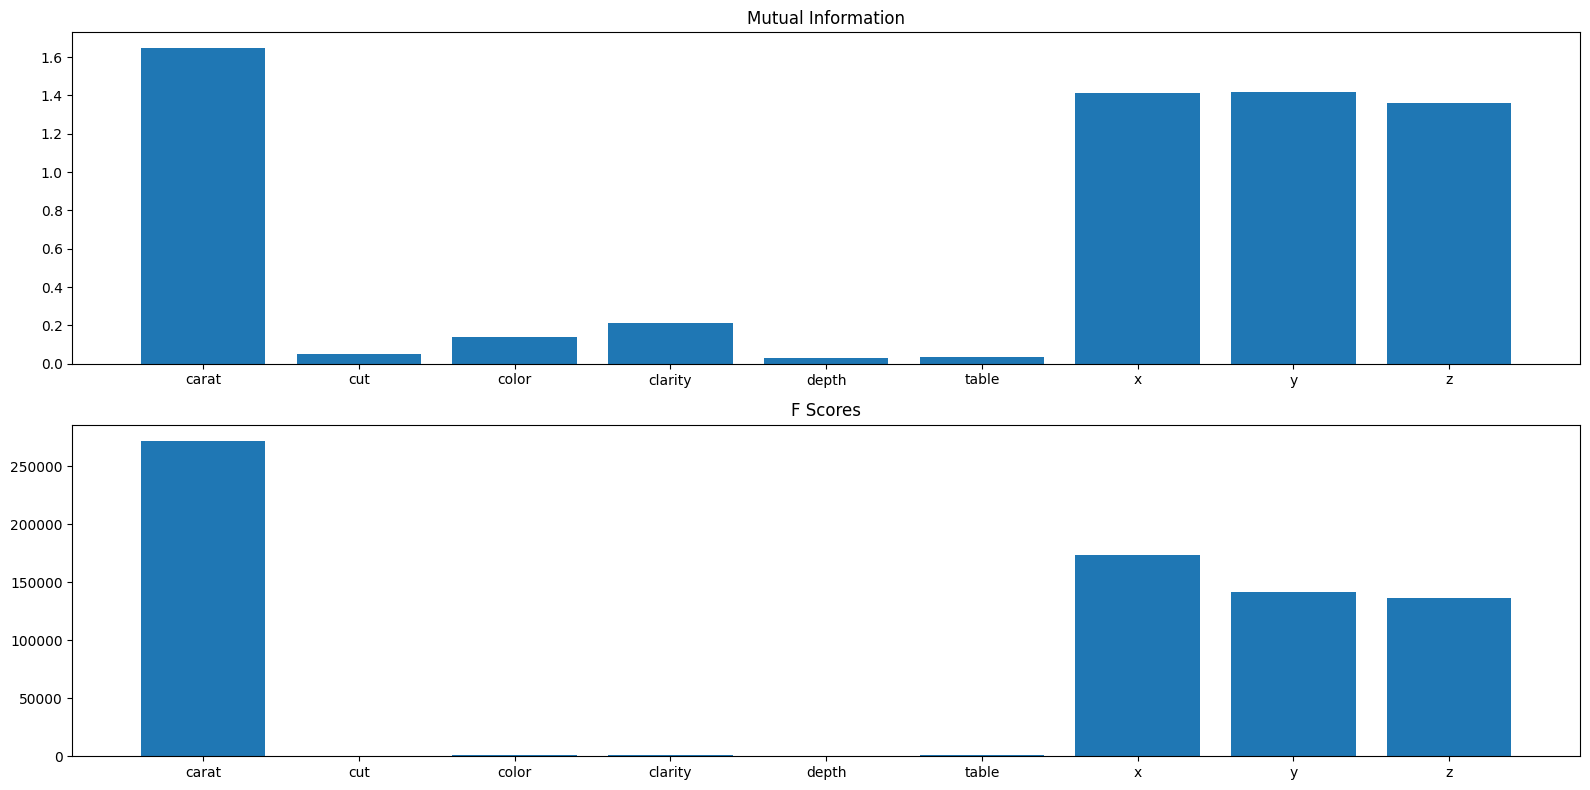

In [6]:
df = loadData(quant=False, unSkew=True)
X_train, X_test, y_train, y_test = scaledTrainTestSplit(qdf)
f1,f2, trimX_train, trimX_test = \
    plotMutualInformation(X_train, X_test, y_train)

Mutual Information
carat: 1.6458928685322283
cut: 0.058351547792578895
color: 0.13968295427702282
clarity: 0.21672877051000627
depth: 0.030486803506200033
table: 0.03818752327438668
x: 1.4058664238563194
y: 1.4172107199595354
z: 1.3569258463570115
___________________________________________
F Scores
carat: 272220.6861000815
cut: 141.33484161682856
color: 1437.231074645064
clarity: 1089.7640912157967
depth: 5.007913620208459
table: 797.4714425822337
x: 173459.13378088933
y: 141226.03682902202
z: 137455.26489606098


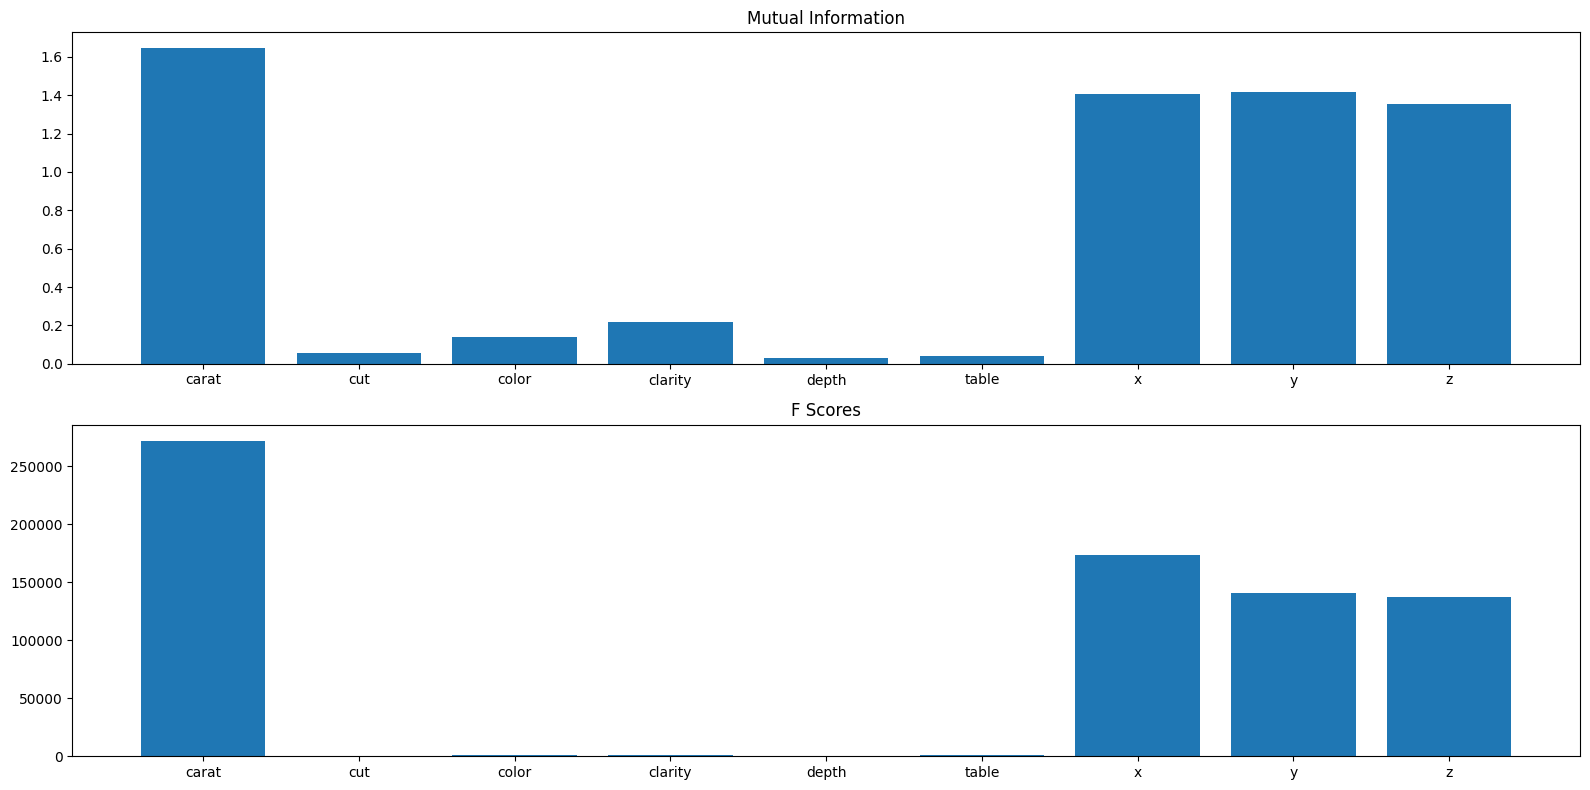

In [7]:
df = loadData()
qdf,ppc = qualtoquan(df)
X_train, X_test, y_train, y_test = scaledTrainTestSplit(qdf)
f1,f2, trimX_train, trimX_test = \
    plotMutualInformation(X_train, X_test, y_train)

It is clear by observation that smallest mutual information is present in depth and table. However, it is important to note that cut is also extremely small. 